#COVID-19 Project - Martin Savransky
We analyze information concerning Covid-19 cases, deaths and recovery from different countries.

We load our csv from:
https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv

In this notebook we show some data visualization on Covid-19 confirmed, recovery and deaths cases in the world.

Finally we create a csv to feed a Bar Race plot that can be seen at:
https://public.flourish.studio/visualisation/5397945/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates=['Date'])
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


World wide cases:
We create a new column summing the values of confirmed, recovered and deaths for each day and country.

In [3]:
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0


In [4]:
df.shape

(76992, 6)

In [5]:
countries = df.Country.unique()
print(countries)
print('Lenght of Countries is', len(countries))


['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jo

In [6]:
df.isna().sum()

Date           0
Country        0
Confirmed      0
Recovered      0
Deaths         0
Total Cases    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76992 entries, 0 to 76991
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         76992 non-null  datetime64[ns]
 1   Country      76992 non-null  object        
 2   Confirmed    76992 non-null  int64         
 3   Recovered    76992 non-null  int64         
 4   Deaths       76992 non-null  int64         
 5   Total Cases  76992 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.5+ MB


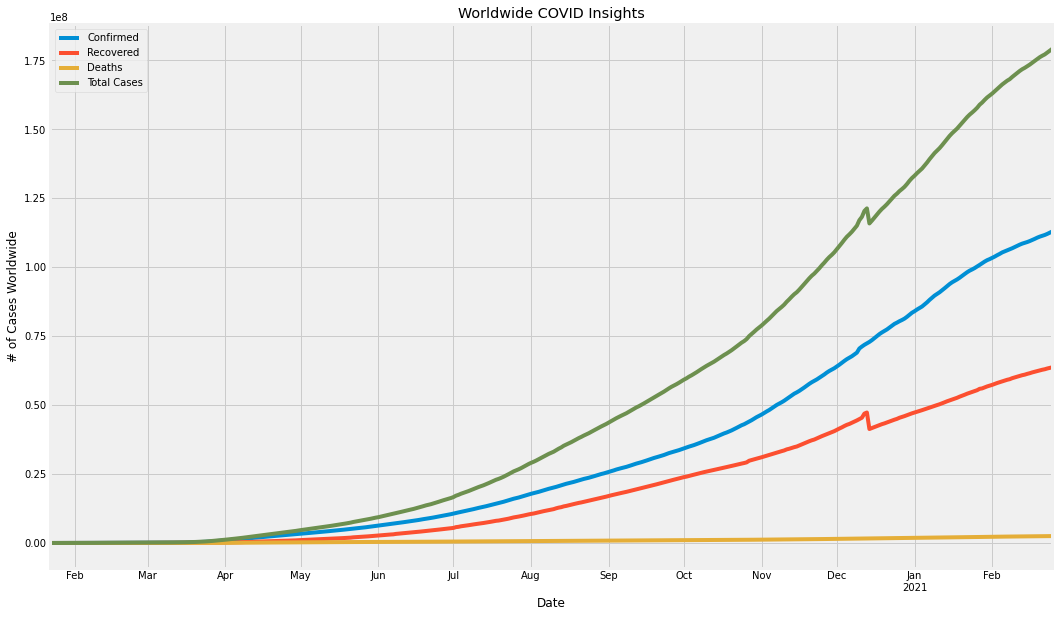

In [8]:
#Worldwide Cases

worldwide_df = df.groupby(['Date']).sum()
w = worldwide_df.plot(figsize=(16,10))
w.set_xlabel('Date')
w.set_ylabel('# of Cases Worldwide')
w.title.set_text('Worldwide COVID Insights')

plt.show()

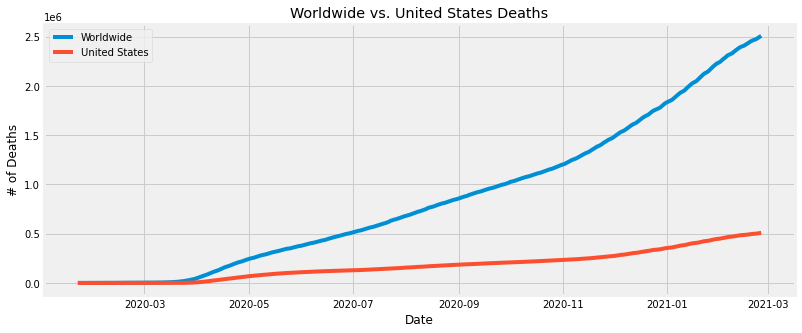

In [9]:
#Compearing worldwide with some specific countries

us_df = df[df['Country']=='US'].groupby(['Date']).sum()


fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['Deaths']], label='Worldwide')
ax.plot(us_df[['Deaths']], label='United States')
ax.set_xlabel('Date')
ax.set_ylabel('# of Deaths')
ax.title.set_text('Worldwide vs. United States Deaths')

plt.legend(loc='upper left')
plt.show()

We can see that United States has arround 20% of deaths in the world.

In [10]:
# United States Daily Cases and Deaths
us_df = us_df.reset_index()
#deaggregate by day
us_df['Daily Confirmed']=us_df['Confirmed'].sub(us_df['Confirmed'].shift())
us_df['Daily Deaths']=us_df['Deaths'].sub(us_df['Deaths'].shift())



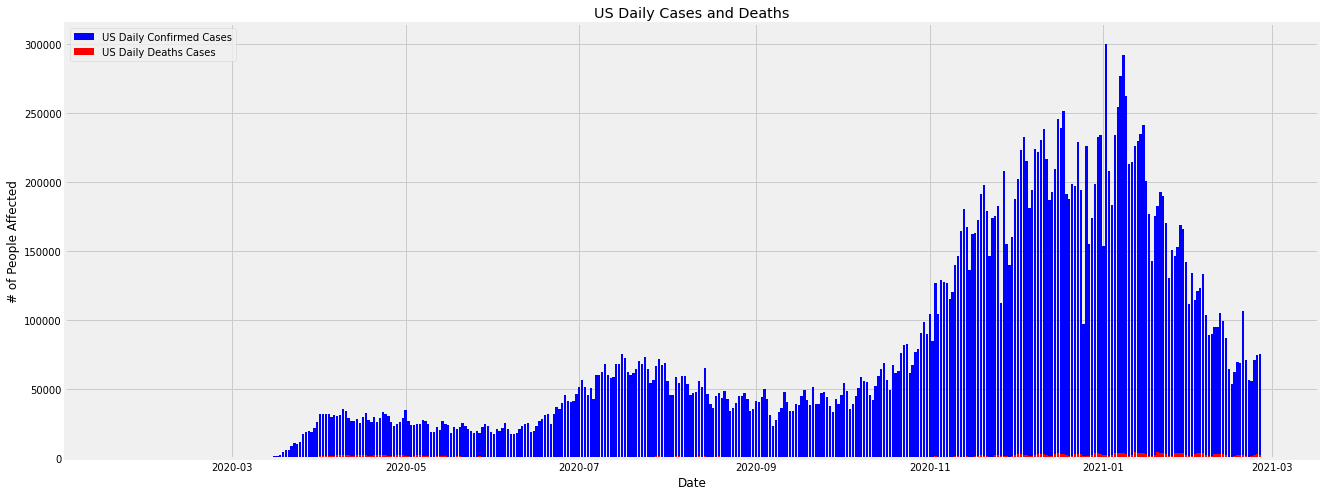

In [11]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

ax.bar(us_df['Date'],us_df['Daily Confirmed'], color='b', label='US Daily Confirmed Cases')
ax.bar(us_df['Date'],us_df['Daily Deaths'], color='r', label='US Daily Deaths Cases')
ax.set_xlabel('Date')
ax.set_ylabel('# of People Affected')
ax.title.set_text('US Daily Cases and Deaths')
plt.legend(loc='upper left')
plt.show()


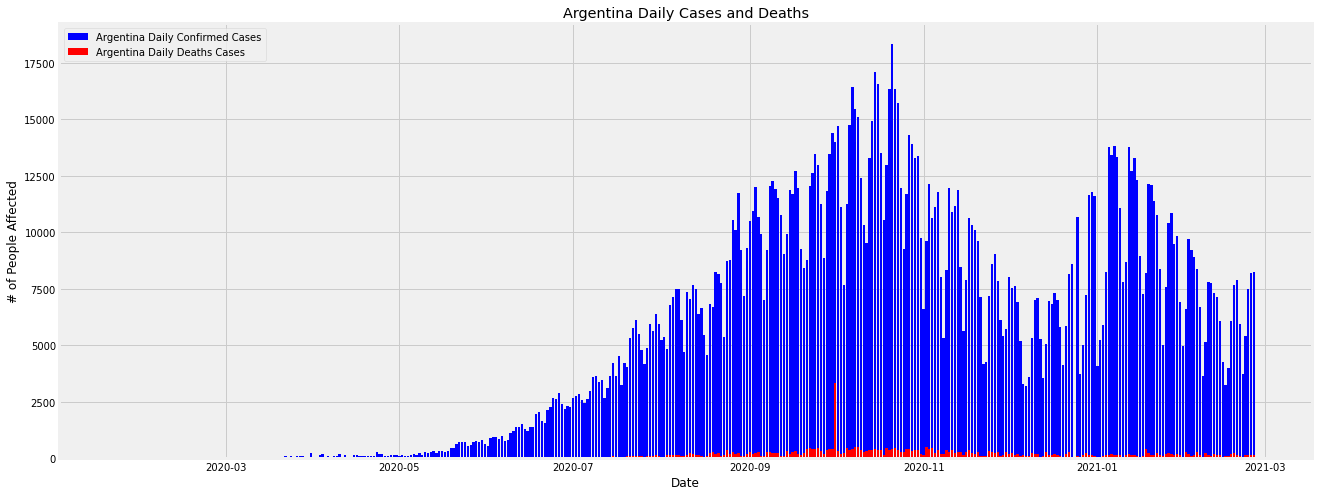

In [12]:
#Argentina
ar_df = df[df['Country']=='Argentina'].groupby(['Date']).sum()

ar_df = ar_df.reset_index()
#deaggregate by day
ar_df['Daily Confirmed']=ar_df['Confirmed'].sub(ar_df['Confirmed'].shift())
ar_df['Daily Deaths']=ar_df['Deaths'].sub(ar_df['Deaths'].shift())

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

ax.bar(ar_df['Date'],ar_df['Daily Confirmed'], color='b', label='Argentina Daily Confirmed Cases')
ax.bar(ar_df['Date'],ar_df['Daily Deaths'], color='r', label='Argentina Daily Deaths Cases')
ax.set_xlabel('Date')
ax.set_ylabel('# of People Affected')
ax.title.set_text('Argentina Daily Cases and Deaths')
plt.legend(loc='upper left')
plt.show()

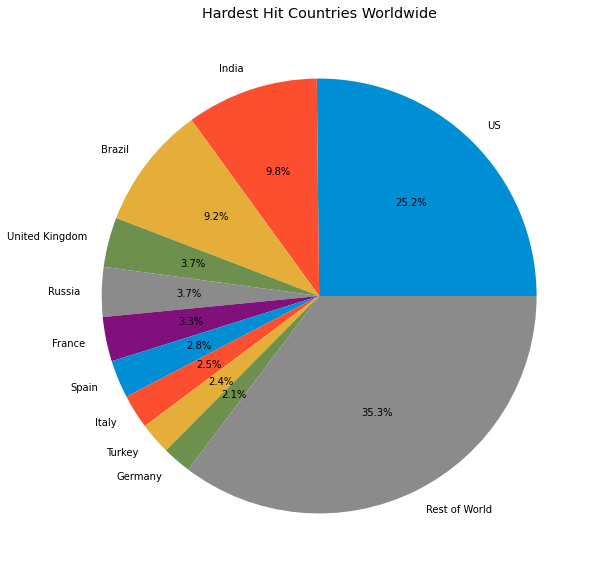

In [13]:
from datetime import date, timedelta
yesterday = date.today() - timedelta(days=2)
yesterday = yesterday.strftime('%Y-%m-%d')
#gives me the most recent data that exists
today_df = df[df['Date'] == yesterday]
top_10 = today_df.sort_values(['Confirmed'], ascending=False)[:10]
top_10.loc['rest-of-world'] = today_df.sort_values(['Confirmed'], ascending=False)[10:].sum()
top_10.loc['rest-of-world','Country'] = 'Rest of World'

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.pie(top_10['Confirmed'], labels=top_10['Country'], autopct='%1.1f%%')
ax.title.set_text('Hardest Hit Countries Worldwide')

#plt.legend(loc='upper left')
plt.show()

In [14]:
#We prepare our data to create a .csv to feed a COVID-19 Deaths Bar Race using Flourish 
df_flour = pd.DataFrame()

In [15]:
for cou in countries:
  df_flour[cou] = df[df['Country']==cou].groupby(['Date']).sum()['Deaths'].T  

In [16]:
df_flour.T

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-06,2021-02-07,2021-02-08,2021-02-09,2021-02-10,2021-02-11,2021-02-12,2021-02-13,2021-02-14,2021-02-15,2021-02-16,2021-02-17,2021-02-18,2021-02-19,2021-02-20,2021-02-21,2021-02-22,2021-02-23,2021-02-24,2021-02-25
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2339,2343,2346,2354,2363,2370,2373,2378,2385,2389,2389,2397,2399,2400,2400,2404,2405,2406,2407,2407,2408,2410,2413,2414,2418,2419,2424,2427,2427,2427,2428,2428,2430,2430,2430,2432,2433,2435,2436,2438
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1277,1281,1287,1291,1296,1303,1310,1315,1324,1332,1339,1350,1358,1369,1380,1393,1398,1404,1418,1433,1446,1460,1472,1488,1503,1517,1531,1543,1555,1567,1582,1600,1617,1636,1653,1666,1681,1696,1715,1736
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2836,2840,2843,2849,2853,2856,2861,2863,2866,2871,2877,2881,2884,2888,2891,2894,2898,2900,2904,2909,2909,2914,2918,2924,2926,2930,2932,2935,2939,2943,2945,2947,2950,2954,2958,2961,2964,2967,2970,2973
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91,91,92,92,93,93,96,96,97,97,98,100,100,101,101,101,102,103,103,104,105,106,106,106,106,106,106,107,107,107,107,107,107,107,107,107,109,110,110,110
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,436,439,442,444,448,452,457,459,461,462,462,464,464,464,466,466,468,470,473,474,475,475,475,478,487,487,490,491,492,493,494,496,498,498,498,499,499,500,501,502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1718,1726,1741,1751,1757,1769,1783,1791,1796,1803,1808,1812,1823,1831,1833,1840,1849,1857,1865,1867,1870,1881,1888,1897,1909,1910,1918,1930,1933,1936,1942,1948,1956,1961,1971,1976,1986,1994,1999,2008
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,612,612,612,612,614,614,615,615,615,615,615,615,615,615,615,615,615,615,615,615,615,615,615,615,616,616,616,616,617,617,618,618,618,618,618,619,619,620,624,625
Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,546,559,578,585,597,610,627,639,660,672,688,705,728,745,763,780,794,804,812,828,839,853,869,881,901,914,931,940,951,959,974,983,991,1002,1016,1020,1031,1040,1051,1059


In [17]:
df_flour.to_csv(r'csvflourDeaths.csv')

Bar Race plot that can be seen at:
https://public.flourish.studio/visualisation/5397945/